# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Auto-Correlation Function

[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is a statistical measure for the dependencies between random processes or between the samples of one random process. The [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) characterizes the temporal dependencies within one random signal $x[k]$. It is an important measure for the analysis of signals in communications engineering, source coding and system identification.

### Definition

For a continuous-amplitude, real-valued random signal $x[k]$ the ACF is defined by the [second-order ensemble average](ensemble_averages.ipynb#Second-Order-Ensemble-Averages) of the signal at two different time-instants $k_1$ and $k_2$

\begin{equation}
\varphi_{xx}[k_1, k_2] = E\{ x[k_1] \cdot x[k_2] \}.
\end{equation}

Under the assumption of [wide-sense stationarity](stationary_ergodic.ipynb#Wide-Sense-Stationary-Random-Processes) (WSS) the ACF does only depend on the difference $\kappa = k_1 - k_2$ between the considered sample indices

\begin{equation}
\varphi_{xx}[\kappa] = E\{x[k] \cdot x[k-\kappa] \},
\end{equation}

where $\kappa$ is commonly chosen as sample index instead of $k$ in order to indicate that it denotes a time shift / lag. The ACF quantifies the similarity of a signal with a shifted version of itself. It has high (positive / negative) values for high similarity and low (positive / negative) values for low similarity.

If the process is additionally [wide-sense ergodic](stationary_ergodic.ipynb#Wide-Sense-Ergodic-Random-Processes), the ACF can be computed by averaging along one sample function

\begin{equation}
\varphi_{xx}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot x[k-\kappa].
\end{equation}

Note that the normalization on the left side of the sum is discarded in some definitions of the ACF. Above summation resembles strongly the definition of the [discrete convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution). For a random signal $x_N[k] = \text{rect}_N[k] \cdot x[k]$ of finite length $N$ and by exploiting the properties of a wide-sense ergodic random process one yields

\begin{equation}
\varphi_{xx}[\kappa] := \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot x_N[k-\kappa] = \frac{1}{N} \; x_N[\kappa] * x_N[- \kappa],
\end{equation}

where the ACF $\varphi_{xx}[\kappa] = 0$ for $|\kappa| > N-1$. Hence, the ACF can be computed by (fast) convolution of the random signal with a time reversed version of itself. 

Note that in numerical implementations (e.g. MATLAB, Python with `mode='full'`), the computed ACF is stored in a vector of length $2 N - 1$. The positive indices $0, 1, \dots, 2 N - 2$ of this vector cannot be directly interpreted as $\kappa$. 
For an interpretation with respect to the actual time lag $\kappa$, $N-1$ must be subtracted from these indices.

Further note that $\frac{1}{N}$-averaging yields a [biased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the ACF, which consistently should be denoted with $\hat{\varphi}_{xx,\mathrm{biased}}[\kappa]$.
The unbiased estimator of the ACF is given as
$$\hat{\varphi}_{xx,\mathrm{unbiased}}[\kappa] = \frac{1}{N-|\kappa|}\sum_{k=0}^{N-1} x_N[k] \cdot x_N[k-\kappa].$$

### Properties

The following properties of the ACF can be deduced from its definition:

1. The ACF $\varphi_{xx}[\kappa]$ has a maximum at $\kappa = 0$. It is given as
    
    $$ \varphi_{xx}[0] = E\{x^2[k]\} = \sigma_x^2 + \mu_x^2 $$
    
    This is due to the fact that the signal is equal to itself for $\kappa = 0$. Please note that for periodic random signals more than one maximum will be present.
    
2. The ACF is a function with even symmetry
    
    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[-\kappa] $$
    
3. For typical random signals, the ACF approaches the limiting value
    
    $$ \lim_{|\kappa| \to \infty} \varphi_{xx}[\kappa] = \mu_x^2 $$
    
    The similarity of a typical random signal is often low for large lags $\kappa$.

4. The ACF of a periodic signal $x[k] = x[k + P]$ is also periodic

    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[\kappa + P] $$
    
    with the period $P \in \mathbb{N} \setminus 0$

A random signal $x[k]$ is said to be **uncorrelated** if

\begin{equation}
\varphi_{xx}[\kappa] = \mu_x^2 + \sigma_x^2 \cdot \delta[\kappa],
\end{equation}

and as correlated if this condition is not met. The samples of a signal which is uncorrelated show no dependencies between each other in a statistical sense.

### Example - Auto-Correlation Function of a Periodic Signal

A periodic signal $x[k]$ can be expressed as

\begin{equation}
x[k] = x_0[k] * \sum_{n = - \infty}^{\infty} \delta[k - nP]
\end{equation}

where $x_0[k]$ denotes the signal of one period. The DTFT $X(\mathrm{e}^{\mathrm{j} \Omega})$ of a periodic signal consists of a series of equidistant Dirac impulses (line spectrum). Lets assume that $x_0[k]$ is a wide-sense ergodic random signal. Expressing the ACF as convolution, transforming this into the frequency domain by the DTFT, and deploying the multiplication property of the Dirac delta, it can be concluded that its ACF is periodic with period $P$. The ACF is then given by convolution over only one period and by its periodic continuation, as

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{N} \left( x_0[\kappa] * x_0[-\kappa] \right) * \sum_{n = - \infty}^{\infty} \delta[k - nP].
\end{equation}

The ACF of a periodic signal is computed and plotted in the following.

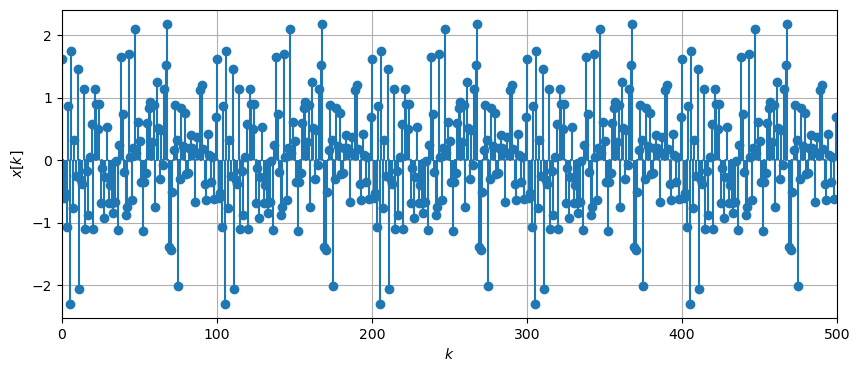

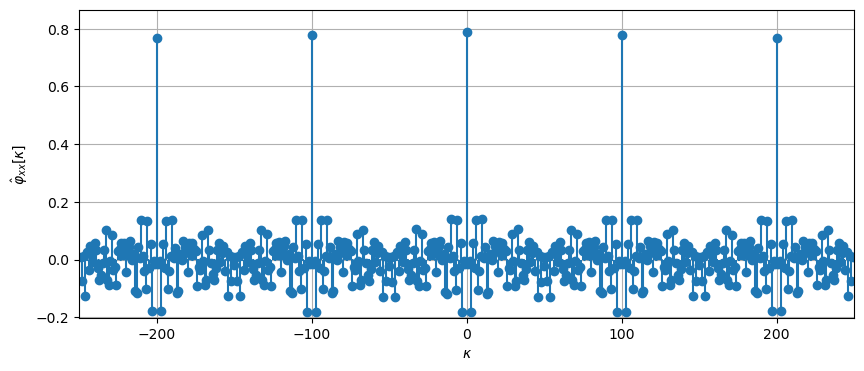

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 8000  # total length of signal
P = 100  # period
K = 250  # upper/lower limit for lag in ACF

# generate periodic random signal
np.random.seed(1)
x0 = np.random.normal(size=P)
x = np.tile(x0, N // P)

# compute and truncate ACF
acf = 1 / len(x) * np.correlate(x, x, mode="full")
acf = acf[(len(x) - 1) - (K - 1) : (len(x) - 1) + K]
kappa = np.arange(-(K - 1), K)

# plot signal and its ACF
plt.figure(figsize=(10, 4))
plt.stem(x[: 2 * K], basefmt="C0:")
plt.xlim(0, 2 * K)
plt.xlabel(r"$k$")
plt.ylabel(r"$x[k]$")
plt.grid()

plt.figure(figsize=(10, 4))
plt.stem(kappa, acf, basefmt="C0:")
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\hat{\varphi}_{xx}[\kappa]$")
plt.axis([-K, K, 1.1 * min(acf), 1.1 * max(acf)])
plt.grid()

**Exercise**

* What period $P$ does the periodic random signal have?

Solution: The period of the random signal can be estimated from the ACF, as both, the signal and its ACF have the same periodicity. Inspection is very convenient with the ACF, where the distance between two adjacent peaks reveals the period in samples, here $P=100$.

### Example - Estimating the Pitch of a Speech Signal

Speech signals are random signals with specific statistical properties that can be related to their production process in the human [vocal tract](https://en.wikipedia.org/wiki/Vocal_tract). To generate vocals, the sound produced by the periodically vibrating vocal folds is filtered by the resonance volumes and articulators above the voice box. 

<audio src="../data/vocal_o.wav" controls>Your browser does not support the audio element.</audio>[../data/vocal_o.wav](../data/vocal_o.wav)

A vocal captured by a microphone generates consequently a signal which is in good approximation periodic. The [fundamental frequency](https://en.wikipedia.org/wiki/Fundamental_frequency) of a periodic signal is given by the inverse of its period time $T_0 = \frac{P}{f_s}$, where $f_s$ denotes the sampling frequency. [Pitch detection](https://en.wikipedia.org/wiki/Pitch_detection_algorithm) algorithms aim at estimating the individual fundamental frequency of speech. One common technique is to estimate the average period from the period of the ACF. The following example estimates and plots the ACF of a recorded vocal 'o'. The ACF is plotted as a continuous line for ease of illustration.

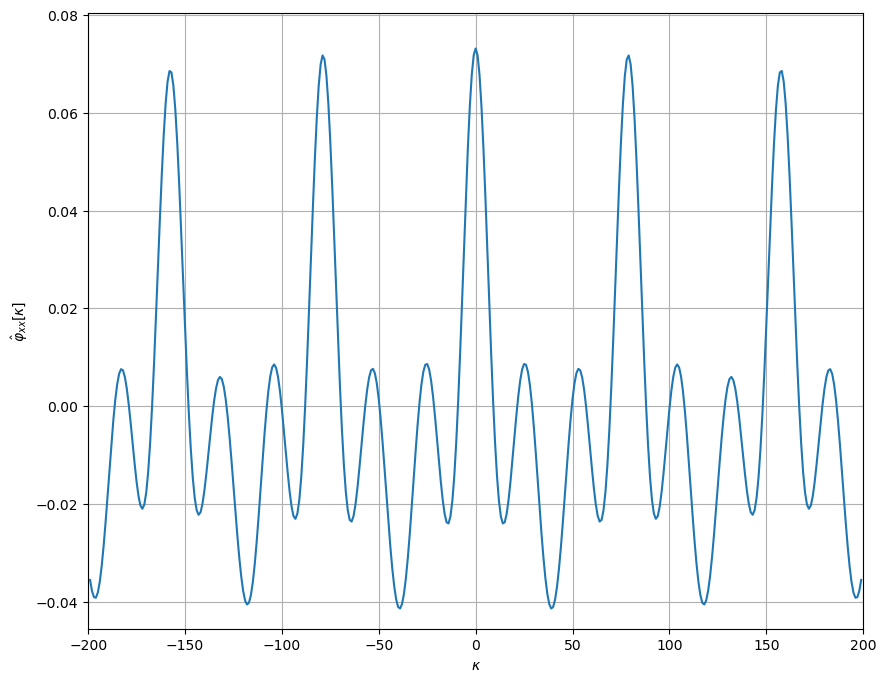

In [2]:
from scipy.io import wavfile

K = 200  # upper/lower limit for lag in ACF

# read audio file
fs, x = wavfile.read("../data/vocal_o_8k.wav")
# wav stored as 16Bit integer, convert it to float
x = np.asarray(x, dtype=float) / 2**15

# compute and truncate ACF
acf = 1 / len(x) * np.correlate(x, x, mode="full")
acf = acf[(len(x) - 1) - (K - 1) : (len(x) - 1) + K]
kappa = np.arange(-(K - 1), K)

# plot ACF
plt.figure(figsize=(10, 8))
plt.plot(kappa, acf)
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\hat{\varphi}_{xx}[\kappa]$")
plt.axis([-K, K, 1.1 * min(acf), 1.1 * max(acf)])
plt.grid()

**Exercise**

* Is the speech signal uncorrelated or correlated?
* Estimate the average fundamental frequency $f_0$ of the vocal from its ACF (sampling frequency $f_\mathrm{s} = 8$  kHz, sampling period $T_s = \frac{1}{f_s} = 0.125$ ms)

Solution: The speech signal is somehow correlated since $\varphi_{xx}[\kappa] \neq 0$ for $\kappa \neq 0$. The fundamental frequency may be estimated from the period $P \approx 80$ of the ACF. This corresponds to a period time of $T_0 = P \cdot T_s = \frac{P}{f_s} = \frac{80}{8000\,\mathrm{Hz}} = 0.01\,\mathrm{s}$. This yields the fundamental frequency $f_0 = \frac{1}{T_0} = 100$ Hz.

## Auto-Covariance Function

The [auto-covariance function](https://en.wikipedia.org/wiki/Covariance) is defined as the ACF of a zero-mean random signal. For a random signal $x[k]$ with linear mean $\mu_x \neq 0$ it is given as

\begin{equation}
\psi_{xx}[\kappa] = \varphi_{xx}[\kappa] - \mu_x^2.
\end{equation}

## Cross-Correlation Function

The cross-correlation function (CCF) is a measure of similarity that two random signals $x[k]$ and $y[k]$ exhibit in a statistical sense.

### Definition

For two continuous-amplitude, real-valued random signals $x[k]$ and $y[k]$ the CCF is defined by the [second-order ensemble average](ensemble_averages.ipynb#Second-Order-Ensemble-Averages) at two different time-instants $k_x$ and $k_y$

\begin{equation}
\varphi_{xy}[k_x, k_y] = E\{ x[k_x] \cdot y[k_y] \}.
\end{equation}

Under the assumption of [wide-sense stationarity](stationary_ergodic.ipynb#Wide-Sense-Stationary-Random-Processes) (WSS) the CCF does only depend on the difference $\kappa = k_x - k_y$ between the considered sample indices

\begin{equation}
\varphi_{xy}[\kappa] = E\{x[k] \cdot y[k - \kappa] \} = E\{x[k + \kappa] \cdot y[k] \}.
\end{equation}

The cross-correlation function (CCF) is a measure of similarity that two random signals $x[k]$ and $y[k - \kappa]$ have with respect to the time shift / lag $\kappa \in \mathbb{Z}$. If $x[k]$ and $y[k]$ originate from wide-sense ergodic processes, the CCF can be computed by averaging along one sample function each as

\begin{equation}
\varphi_{xy}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot y[k-\kappa].
\end{equation}

For finite length random signals $x_N[k] = \text{rect}_N[k] \cdot x[k]$ (assigning length $N$ to $x$) and $y_M[k] = \text{rect}_M[k] \cdot y[k]$ (assigning length $M$ to $y$) one yields

\begin{equation}
\varphi_{xy}[\kappa] := \frac{1}{N} \sum_{k=0}^{N-1} x_N[k] \cdot y_M[k-\kappa] = \frac{1}{N} \; x_N[\kappa] * y_M[- \kappa],
\end{equation}

where the CCF $\varphi_{xy}[\kappa] = 0$ for $\kappa < -(M-1)$ and $\kappa > N-1$. The CCF can be computed by (fast) convolution of one random signal with a time reversed version of the other random signal. The connections between the linear convolution and the cross-correlation of two signals allows an interesting interpretation of linear time-invariant (LTI) systems. An LTI system correlates the input signal with the time reversed impulse response in order to generate the output signal.

Note that in numerical implementations (e.g. MATLAB, Python with `mode='full'`), the computed ACF is stored in a vector of length $N + M - 1$. The positive indices $0, 1, \dots, N + M - 2$ of this vector cannot be directly interpreted as $\kappa$. 
For interpretation with respect to the actual time lag $\kappa$, $M-1$ must be subtracted  from these indices. Above results hold also for the CCF $\varphi_{yx}[\kappa]$ when exchanging $x[k]$ with $y[k]$ and $N$ with $M$.

Further note that $\frac{1}{N}$-averaging is a convention chosen here to be consistent with above introduced temporal averaging concept. The common choice for $N=M$ yields the biased estimator for the CCF, but special care on the interpretation is required if $N\neq M$.

If $x$ and $y$ are just swapped (i.e. $x$ is of length $M$, $y$ of length $N$ then), the result differs in terms of the time alignment and for the amplitude values of the CCF. The latter is due to $\frac{1}{N}$-averaging. See the simple example below, where in the first case, $N=3$ and $M=4$ and thus averaging with $\frac{1}{3}$, whereas in the second case, $N=4$ and $M=3$ deploys averaging by $\frac{1}{4}$. It is worth to check the two different time alignments then.

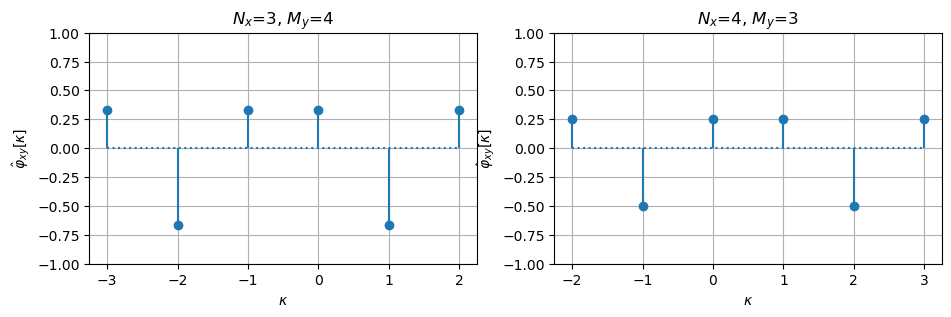

In [3]:
plt.figure(figsize=(11, 3))

plt.subplot(1, 2, 1)  # case 1: x shorter than y
x = (1, -1, 1)
y = (1, -1, -1, 1)
N = len(x)
M = len(y)
xc1 = 1 / N * np.correlate(x, y, mode="full")
kappa1 = np.arange(0, N + M - 1) - (M - 1)
plt.stem(kappa1, xc1, basefmt="C0:")
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\hat{\varphi}_{xy}[\kappa]$")
plt.title(r"$N_x$=" + str(N) + ", $M_y$=" + str(M))
plt.ylim(-1, 1)
plt.grid(True)

plt.subplot(1, 2, 2)  # case 2: x longer than y
y, x = x, y  # elegant variable swap
N, M = M, N
xc2 = 1 / N * np.correlate(x, y, mode="full")
kappa2 = np.arange(0, N + M - 1) - (M - 1)
plt.stem(kappa2, xc2, basefmt="C0:")
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\hat{\varphi}_{xy}[\kappa]$")
plt.title(r"$N_x$=" + str(N) + ", $M_y$=" + str(M))
plt.ylim(-1, 1)
plt.grid(True)

### Properties

1. When exchanging the two random signals, the CCF exhibits the following symmetry 

    $$ \varphi_{xy}[\kappa] = \varphi_{yx}[-\kappa] $$
    
2. For typical random processes, the CCF approaches the limiting value

    $$ \lim_{|\kappa| \to \infty} \varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$$

Two random signals are said to be [**uncorrelated**](https://en.wikipedia.org/wiki/Uncorrelated_random_variables) if
    
\begin{equation}
\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y
\end{equation}

and as correlated if this condition is not met. The samples of two signals which are uncorrelated to each other show no dependencies between each other in a statistical sense. $\varphi_{xy}[\kappa] = 0$ for uncorrelated signals if one of the two random processes exhibits zero-mean.

### Example - Time-of-Arrival Estimation

The CCF can be used to estimate the [time-of-arrival (TOA)](https://en.wikipedia.org/wiki/Time_of_arrival) of a signal transmitted from a sender to a receiver. The TOA is used for instance for [radiolocation](https://en.wikipedia.org/wiki/Radiolocation) or sound source localization. For ease of illustration it is assumed that a random signal $x[k]$ is only delayed by the transmission channel. The received signal $y[k]$ is then just a delayed version of transmitted signal

\begin{equation}
y[k] = x[k - k_0] = x[k] * \delta[k - k_0].
\end{equation}

The aim is to estimate the delay $k_0$ by observation of the received signal under knowledge of the transmitted signal. Under the assumption of finite length signals, the CCF between the transmitted and the received signal is given as

\begin{equation}
\begin{split}
\varphi_{xy}[\kappa] &= \frac{1}{N} x_N[\kappa] * y_M[-\kappa] \\
&= \frac{1}{N} \left( x_N[\kappa] * x_N[-\kappa] \right) * \delta[-k+k_0] \\
&= \frac{1}{N} \varphi_{xx}[\kappa] * \delta[k - k_0],
\end{split}
\end{equation}

where the associativity of the convolution and the even symmetry of the Dirac pulse has been used. The delay between the two signals results in a shift of the ACF of the transmitted signal. The delay can be estimated by finding the maximum value of the CCF $\varphi_{xy}[\kappa]$, if the ACF $\varphi_{xx}[\kappa]$ of the transmitted signal $x[k]$ exhibits a pronounced maximum at $\kappa = 0$

\begin{equation}
\hat{k}_0 = \underset{\kappa}{\mathrm{argmax}} \{ \varphi_{xy}[\kappa] \}.
\end{equation}

One can differentiate between to types of transmitted signals: (i) ones which have been designed explicitly for TOA estimation and (ii) application specific signals. The latter are for instance wireless or speech signals which are used in the applications where specific measurement signals may not be appropriate. For the former, there exist various choices for finite length random sequences with good auto-correlation properties.

The Gold code is a pseudo random noise (PRN) sequence used in the [Global Positioning System (GPS)](https://en.wikipedia.org/wiki/Global_Positioning_System) to estimate the TOA between satellites and a GPS receiver. It constitutes a series of binary sequences with good auto- and cross-correlation properties. The latter is required to lower the interference between the sequences of different GPS satellites. The properties of these specific random signals are investigated and the application of these sequences to TOA estimation is illustrated. First the pre-computed sequences are loaded and a function for computing and plotting the CCF (and ACF) is defined for convenience

In [4]:
# load set of PRN sequences (Gold codes)
prn = np.load("../data/gold_sequences.npz")["prn"]


def compute_plot_CCF(x, y, ylabel, K=30):
    """Computes, truncates and plots CCF."""
    ccf = 1 / len(x) * np.correlate(x, y, mode="full")
    ccf = ccf[(len(y) - 1) - K : len(y) + K]
    kappa = np.arange(-K, K + 1)

    # plot CCF
    plt.stem(kappa, ccf, basefmt="C0:")
    plt.xlabel(r"$\kappa$")
    plt.ylabel(ylabel)
    plt.axis([-K, K, 1.1 * min(ccf), 1.1 * max(ccf)])
    plt.grid()

    return ccf

The ACF for one particular PRN sequence (one sample function) and the CCF between two different PRN sequences is computed and plotted.

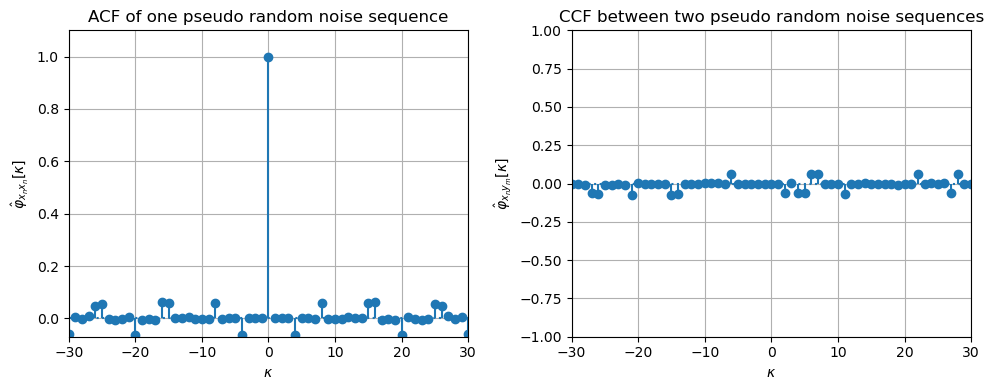

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
xi = yi = 10  # CCF
compute_plot_CCF(prn[xi, :], prn[yi, :], r"$\hat{\varphi}_{x_n x_n}[\kappa]$")
plt.title("ACF of one pseudo random noise sequence")

plt.subplot(122)
xi, yi = 10, 16  # ACF
compute_plot_CCF(prn[xi, :], prn[yi, :], r"$\hat{\varphi}_{x_n y_m}[\kappa]$")
plt.title("CCF between two pseudo random noise sequences")
plt.ylim([-1, 1])
plt.tight_layout()

The ACF features a pronounced peak for $\kappa = 0$ and thus the two PRN sequences are reasonably uncorrelated. Now, one particular sequence is delayed in order to model the received signal. The CCF is plotted and the TOA is estimated by finding the maximum value of the CCF between the transmitted and received sequence

Estimated TOA delay is 15 samples


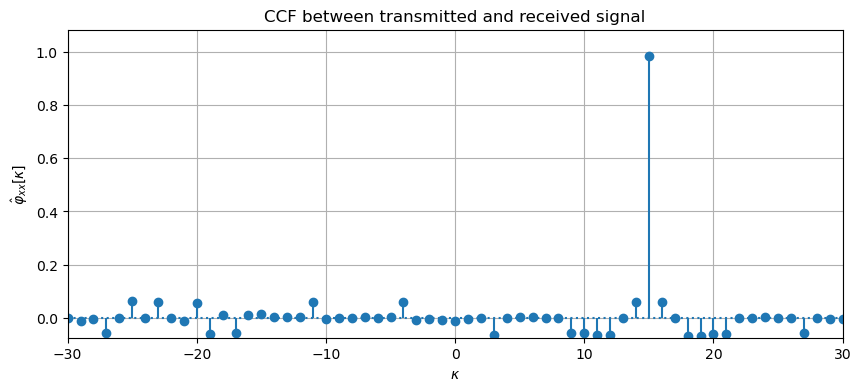

In [6]:
k0 = 15  # true TOA delay in samples
K = 30  # upper/lower limit for lag in ACF

x = prn[16, :]  # pick one PRN sequence, sender, source signal
y = x[k0:]  # delay transmitted signal by k0 samples, receiver, sink signal

# compute and plot CCF
plt.figure(figsize=(10, 4))
ccf = compute_plot_CCF(x, y, r"$\hat{\varphi}_{xx}[\kappa]$", K=K)
plt.title("CCF between transmitted and received signal")

# estimate the TOA
print("Estimated TOA delay is {:2.0f} samples".format(np.argmax(ccf) - K))

**Exercise**

* Add a random signal with different levels to the received signal. How does this influence the TOA estimation?

Solution: Additive noise can be added for instance by extending above example with `y = y + 0.1 * np.random.normal(len(y))`. Additive noise corrupts the CCF. For high levels, the maximum value of the CCF might not correspond to the delay $k_0$ anymore.

### Example - Cross-Correlation Function of Two Random Signals

The following example estimates and plots the CCF of two random signals $x[k]$ and $y[k]$ of finite lengths $N$ and $M = 2 N$.

Mean of signal x[k]: 2.02
Mean of signal y[k]: 3.06


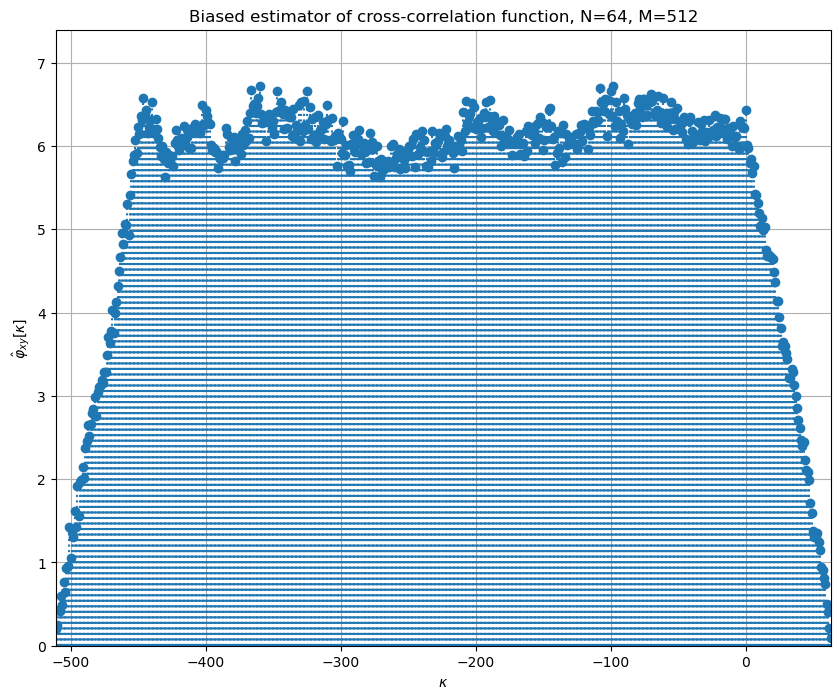

In [7]:
L = 2**8  # length

# generate two uncorrelated random signals
np.random.seed(1)
x = 2 + np.random.normal(size=L // 4)
y = 3 + np.random.normal(size=L * 2)

# compute CCF
ccf = 1 / len(x) * np.correlate(x, y, mode="full")  # biased estimator
kappa = np.arange(0, len(x) + len(y) - 1) - (len(y) - 1)
# ccf = L/(L-np.abs(kappa)) * ccf  # unbiased estimator, only if len(x)==len(y)

# print mean values of signals
print("Mean of signal x[k]: %3.2f" % np.mean(x))
print("Mean of signal y[k]: %3.2f" % np.mean(y))

# plot CCF
plt.figure(figsize=(10, 8))
plt.stem(kappa, ccf, basefmt="C0:", linefmt="C0:")
plt.title(
    "Biased estimator of cross-correlation function, N="
    + str(len(x))
    + ", M="
    + str(len(y))
)
plt.ylabel(r"$\hat{\varphi}_{xy}[\kappa]$")
plt.xlabel(r"$\kappa$")
plt.axis([kappa[0], kappa[-1], 0, 1.1 * max(ccf)])
plt.grid()

**Exercise**

* Can the signals be assumed to be correlated or uncorrelated when considering the CCF in the range $-M < \kappa < 0$ only?
* Why does the CCF of the two finite length signals have this overall trapezoid like shape? 
* What would be its theoretic value for signals of infinite length?

Solution: The CCF is approximately constant for $-M < \kappa < 0$. Consequently, the random signals $x[k]$ and $y[k]$ can be assumed to be uncorrelated. The trapezoidal shape of the CCF results from the truncation of the random signals to a finite number of samples. This truncation can be modeled as a multiplication of the infinite length signals by a rectangular signal $\text{rect}_N[k]$ and $\text{rect}_M[k]$, respectively. Interpreting the CCF as convolution and having in mind that the convolution of two rectangular signals results in a signal of trapezoidal shape explains the shape of the CCF shown above. Its theoretic value is constant with a value given by the multiplication of the two linear means of the random signals $\varphi_{xy}[\kappa] = \mu_x \cdot \mu_y$, here 6.

## Cross-Covariance Function

The [cross-covariance function](https://en.wikipedia.org/wiki/Covariance) is defined as the CCF of two zero-mean random signals. For two random signals $x[k]$ and $y[k]$ with linear means $\mu_x \neq 0$ and $\mu_y \neq 0$ it is given as

\begin{equation}
\psi_{xy}[\kappa] = \varphi_{xy}[\kappa] - \mu_x \cdot \mu_y
\end{equation}

The properties of the CCF yield that the cross-covariance function $\psi_{xy}[\kappa]$ of two uncorrelated signals $x[k]$ and $y[k]$ is zero, i.e. $\psi_{xy}[\kappa] = 0$.

**Exercise**

* What would the plot for $\psi_{xy}[\kappa]$ look like for the [example above](#Example---Cross-Correlation-Function-of-Two-Random-Signals) under the assumption of finite length signals?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.